<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Principle Component Analysis**


![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/PCA.jpeg)

Estimated time needed: **45** minutes


## Use cases of PCA

*   Facial Recognition
*   Image Compression
*   Finding patterns in data of high dimension in the field of quantitative finance.

For instance, suppose you are a fund manager who has 200 stocks in a portfolio. To analyze the potential movements and relationships of the stocks, you would need to  at least work with a 200$\times$200 correlation or covariance matrix, which is very complex.

However, instead of looking at 200 stock variances, would it be more efficient to just look at 10 most dominant/principal directions of variances that best represent the original variances of the stocks?

PCA is a methodology to reduce the dimensionality of a complex problem.

<img src='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fundmanager.jpg' style="width: 70%">


In this notebook, you will explore how to simplify and reduce the dimensionality of various data using **principle component analysis** (PCA)


## **Table of Contents**

<!-- <a href="#Principle-Component-Analysis">Principle Component Analysis</a> -->

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Background">Background</a>
        <ol>
            <li><a href="https://##What-does-PCA-do?">What does PCA do?</a></li>
            <li><a href="https://#How-does-PCA-work?-(optional)">How does PCA work? (optional)</a></li>
        </ol>
    </li>
    <li>
        <a href="https://##Visual-Example">Visual Example</a>
        <ol>
            <li><a href="https://#Scaling-data">Scaling Data</a></li>
            <li><a href="https://#Applying-PCA">Applying PCA</a></li>
            <li><a href="https://#Putting-it-all-Together">Putting it all Together</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Using-PCA-to-Improve-Facial-Recognition">Using PCA to Improve Facial Recognition</a>
    </li>
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Scaling-the-Data">Exercise 1 - Scaling the Data</a></li>
    <li><a href="https://#Exercise-2---Fitting-PCA-Object">Exercise 2 - Fitting PCA Object</a></li>
    <li><a href="https://#Exercise-3---Finding-Desired-Number-of-Components">Exercise 3 - Finding Desired Number of Components</a></li>
    <li><a href="https://#Exercise-4---Dimensionality-Reduction">Exercise 4 - Dimentionality Reduction</a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Understand** what PCA is and how (generally) it works.
*   **Understand** when PCA is useful.
*   **Apply** PCA effectively.


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for additional plotting tools.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or locally) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [52]:
# Tất cả các thư viện cần thiết cho lab này được liệt kê bên dưới. Các thư viện được cài đặt sẵn trên Skills Network Labs đã được comment lại.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Lưu ý: Nếu môi trường của bạn không hỗ trợ "!mamba install", hãy sử dụng "!pip install pandas==1.3.4 ..."

### Importing Required Libraries


In [53]:
# Ngăn chặn cảnh báo khi sử dụng phiên bản sklearn cũ hơn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from tqdm import tqdm # Thư viện để hiển thị thanh tiến trình
import numpy as np # Thư viện cho các phép toán số học
import pandas as pd # Thư viện để làm việc với dữ liệu dạng bảng (DataFrame)
from itertools import accumulate # Hàm để tính tổng tích lũy

import matplotlib.pyplot as plt # Thư viện để vẽ biểu đồ
import seaborn as sns # Thư viện để vẽ biểu đồ đẹp hơn, dựa trên matplotlib
%matplotlib inline
 # Hiển thị biểu đồ ngay trong notebook

from sklearn.preprocessing import StandardScaler # Để chuẩn hóa dữ liệu
from sklearn.decomposition import PCA # Để thực hiện Phân tích thành phần chính (PCA)
from sklearn.model_selection import train_test_split # Để chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import RandomizedSearchCV # Để tìm kiếm ngẫu nhiên các siêu tham số tốt nhất
from sklearn.datasets import fetch_lfw_people # Để tải bộ dữ liệu khuôn mặt LFW
from sklearn.metrics import classification_report # Để báo cáo kết quả phân loại
from sklearn.metrics import confusion_matrix # Để tạo ma trận nhầm lẫn
from sklearn.svm import SVC # Thuật toán phân loại Máy vector hỗ trợ (SVM)
from scipy.stats import loguniform # Để lấy mẫu từ phân phối log-uniform cho RandomizedSearchCV

warnings.filterwarnings('ignore') # Bỏ qua các cảnh báo

sns.set_context('notebook') # Đặt ngữ cảnh hiển thị biểu đồ cho notebook
sns.set_style('white') # Đặt kiểu hiển thị biểu đồ màu trắng

### Defining Helper Functions

Below, we define helper functions to simplify your code later on:


In [54]:
def plot_explained_variance(pca):
    # Hàm này vẽ biểu đồ tỷ lệ phương sai được giải thích tích lũy cho một đối tượng PCA đã fit.
    acc = [*accumulate(pca.explained_variance_ratio_)] # Tính tổng tích lũy của tỷ lệ phương sai được giải thích
    fig, ax = plt.subplots(1, figsize=(50, 20)) # Tạo một figure và một axes với kích thước lớn
    ax.stackplot(range(pca.n_components_), acc) # Vẽ biểu đồ diện tích tích lũy
    ax.scatter(range(pca.n_components_), acc, color='black') # Vẽ các điểm đánh dấu trên biểu đồ
    ax.set_ylim(0, 1) # Đặt giới hạn trục y từ 0 đến 1
    ax.set_xlim(0, pca.n_components_-1) # Đặt giới hạn trục x
    ax.tick_params(axis='both', labelsize=36) # Đặt kích thước nhãn trục
    ax.set_xlabel('N Components', fontsize=48) # Đặt nhãn trục x
    ax.set_ylabel('Accumulated explained variance', fontsize=48) # Đặt nhãn trục y
    plt.tight_layout() # Điều chỉnh layout để tránh chồng chéo
    plt.show() # Hiển thị biểu đồ

## Background

Before we begin using **PCA**, we should first understand:

1.  What PCA does
2.  How PCA Works


### What does PCA do?

*   Reduces the dimensionality of data. By reducing data dimensionality, PCA can also help with visualization.
*   May reduce noise in the process

\-Can be used to pre-process data improving the result of your algorithm


### How does PCA work? (optional)

1.  Looks at an $n$ -dimensional dataset and breaks it down into "general trends" or **components**

```
- When we say "$n$-dimensional", we mean the data has $n$ features.
```

2.  The components are then **sorted by how much of the explained variance they account for** (*eigenvalues* provide this information)

```
- This means if a component is highly-uncorrelated with all others, it's a "strong" component and provides useful information that is very hard to infer from all other components.
```

3.  Then, given some parameter (usually chosen by the data engineer), the new dimension of the data is decided. Let this be $k$.

```
- Note $k$ is always $k \leq n$ because we're only trying to reduce the dimension of our data.
```

4.  Finally, the original $n$ dimensional dataset is projected onto the $k$-dimensional plane chosen by our **top-$k$ components that take care of the most explained variance**.

```
- These top- $k$ components are now used
```

Because principle components span an (at most) $k$-dimensional surface, we have successfully reduced our data to at least $k \leq n$ dimensions!


## Visual Example

Let's look at an example that will visually demonstrate PCA in action.

Load the dataset `HeightsWeights.csv` which contains a list of various people's heights (in inches) and weight (in pounds and kg):


In [55]:
# Tải dữ liệu từ URL vào DataFrame
hwdf = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/HeightsWeights.csv', index_col=0)
# Hiển thị 5 dòng đầu tiên của DataFrame
hwdf.head()

,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,65.78331,112.9925,51.253062
2,71.51521,136.4873,61.910233
3,69.39874,153.0269,69.412546
4,68.21660,142.3354,64.562914
5,67.78781,144.2971,65.452735


### Scaling data

**You should (almost) always scale your data before applying PCA**

**Why?**: There are many reasons, here are some:

*   Scaling your features make the features have the same standard deviation => same weight.

*   If the features have the same weight, PCA is able to best find the most significant components (principal components) without being biased towards features with high variance.

*   Computers do not do well in adding large numbers and small numbers, so, if all data is in the same range  algorithms usually perform better.

Let's use the `StandardScaler` from `sklearn.preprocessing`:


In [56]:
# Tạo một đối tượng StandardScaler để chuẩn hóa dữ liệu
scaler = StandardScaler()
# Áp dụng chuẩn hóa cho toàn bộ DataFrame và gán lại
hwdf[:] = scaler.fit_transform(hwdf)
# Đổi tên cột để chỉ rõ đã được chuẩn hóa
hwdf.columns = [f'{c} (scaled)' for c in hwdf.columns]
# Hiển thị 5 dòng đầu tiên của DataFrame sau khi chuẩn hóa
hwdf.head()

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214
4,0.117523,1.308328,1.308328
5,-0.107961,1.476561,1.476561


Let's look at 3-D plot of our data (one dimension per feature):


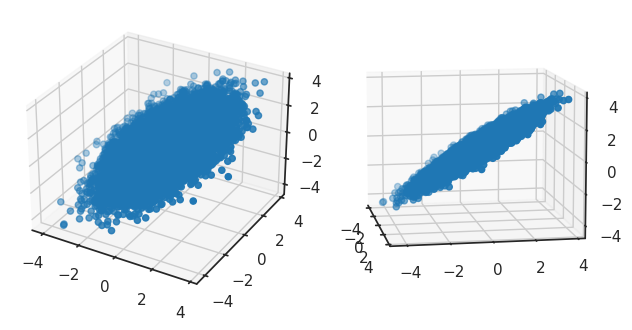

In [57]:
# Tạo một figure
fig = plt.figure()
# Thêm subplot 3D đầu tiên
ax1 = fig.add_subplot(121, projection='3d')
# Lấy dữ liệu cho các trục x, y, z từ các cột của DataFrame
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
# Vẽ biểu đồ scatter 3D
ax1.scatter(xs, ys, zs)

# Thêm subplot 3D thứ hai
ax2 = fig.add_subplot(122, projection='3d')
# Lấy dữ liệu cho các trục x, y, z từ các cột của DataFrame (lặp lại)
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
# Đặt góc nhìn cho biểu đồ 3D
ax2.view_init(elev=10, azim=-10)
# Vẽ biểu đồ scatter 3D
ax2.scatter(xs, ys, zs)

# Điều chỉnh layout để tránh chồng chéo
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

As you can see, our data here forms a plane.

This is because the *weight in kilograms does not provide any more information than weight in pounds* (or vice-versa).

This becomes clear with the following, alternate perspective, showing the 2d relationships between the pairs of data and calculating the correlation  :


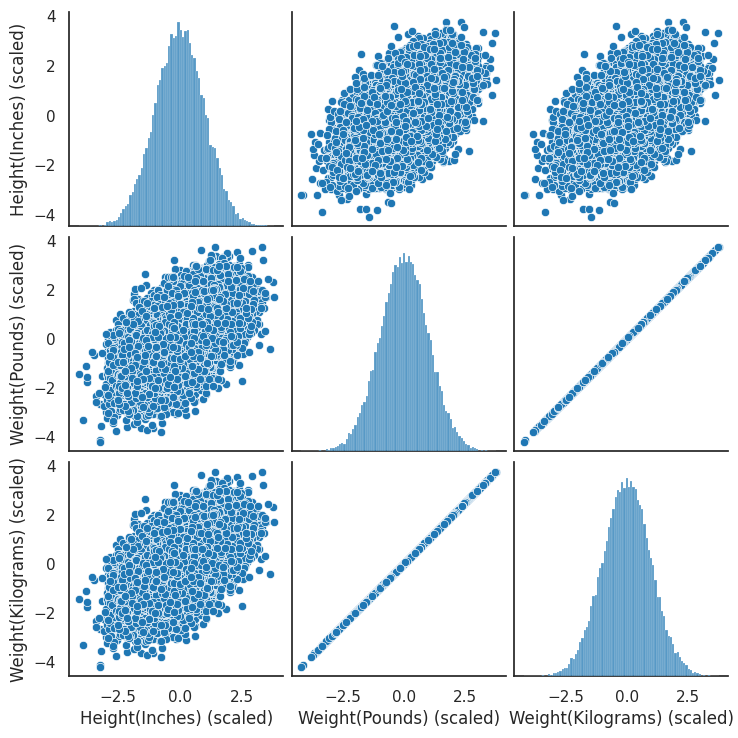

In [58]:
# Vẽ biểu đồ pairplot để xem mối quan hệ giữa các cặp feature
sns.pairplot(hwdf)
# Hiển thị biểu đồ
plt.show()

In [59]:
# Tính ma trận tương quan và hiển thị với màu nền gradient
hwdf.corr().style.background_gradient(cmap='coolwarm')

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Height(Inches) (scaled),1.000000,0.502859,0.502859
Weight(Pounds) (scaled),0.502859,1.000000,1.000000
Weight(Kilograms) (scaled),0.502859,1.000000,1.000000


We see the weights are perfectly correlated, which means **Weight(Pounds)** tells us everything we need to know about **Weight(Kilograms)** ,thus we have clearly **redundant** data! Although, this example is exaggerated, it'll help demonstrate where PCA shines.


<b>Note</b> Standardizing your data before applying PCA is called *whitening*.


### Applying PCA

It's time to apply PCA, let's first apply PCA keeping the same dimension as the original data, i.e.: `n_components=3`.


In [60]:
# Tạo một đối tượng PCA
pca = PCA()
# Fit PCA vào dữ liệu đã chuẩn hóa
pca.fit(hwdf)

PCA()

We can find the projection of the dataset onto the principal components call it `Xhat` , this is our "new" dataset, it is the same shape as the original dataset


In [61]:
# Áp dụng PCA transform lên dữ liệu để có dữ liệu mới chiếu lên các thành phần chính
Xhat = pca.transform(hwdf)
# Hiển thị kích thước của dữ liệu mới
Xhat.shape

(25000, 3)

Let’s look at the new dataset as a dataframe.


In [62]:
# Tạo DataFrame từ dữ liệu đã được transform bởi PCA
hwdf_PCA = pd.DataFrame(columns=[f'Projection on Component {i+1}' for i in range(len(hwdf.columns))], data=Xhat)
# Hiển thị 5 dòng đầu tiên của DataFrame mới
hwdf_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3
0,-2.051774,-0.243847,1.094627e-15
1,1.866218,1.117813,3.299626e-16
2,3.133436,-0.794420,3.332217e-16
3,1.696186,-0.748473,-3.318554e-16
4,1.803402,-1.058234,-1.055047e-16


**Why** are the values in the third column all essentially zero?

Let's look at the principle components:


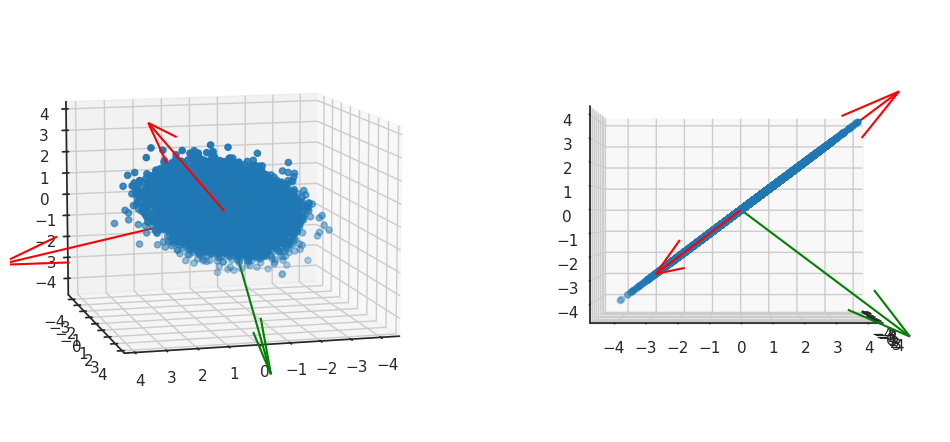

red component accounts for 78.98% of explained variance
red component accounts for 21.02% of explained variance
green component accounts for 0.00% of explained variance


In [63]:
# Định nghĩa màu sắc cho các thành phần chính
colors = ['red', 'red', 'green']

# Tạo figure và subplot 3D
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121, projection='3d')
# Lấy dữ liệu gốc đã chuẩn hóa
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
# Đặt góc nhìn
ax1.view_init(elev=10, azim=75)
# Vẽ dữ liệu gốc
ax1.scatter(xs, ys, zs)

# Vẽ các vector thành phần chính
for component, color in zip(pca.components_, colors):
    ax1.quiver(*[0, 0, 0], *(8 * component), color=color)

# Thêm subplot 3D thứ hai
ax2 = fig.add_subplot(122, projection='3d')
# Lấy dữ liệu gốc đã chuẩn hóa
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
# Đặt góc nhìn
ax2.view_init(elev=0, azim=0)
# Vẽ dữ liệu gốc
ax2.scatter(xs, ys, zs)

# Vẽ các vector thành phần chính
for component, color in zip(pca.components_, colors):
    ax2.quiver(*[0, 0, 0], *(8 * component), color=color)

# Hiển thị biểu đồ
plt.show()

# In tỷ lệ phương sai được giải thích cho từng thành phần
for color, ev in zip(colors, pca.explained_variance_ratio_):
    print(f'{color} component accounts for {ev * 100:.2f}% of explained variance')

The 3 colored arrows represent the directions of maximum variance in the original data `hwdf`. The new dataset `Xhat` is the projection of `hwdf` onto each principal component.

Most of the original data seems parallel to the red principle components meaning they are the two most dominant directions of variance of `hwdf`. The  green component is perpendicular to the data, as a result the projection is small.


We convert this new data to a Dataframe and see the points appear uncorrelated:


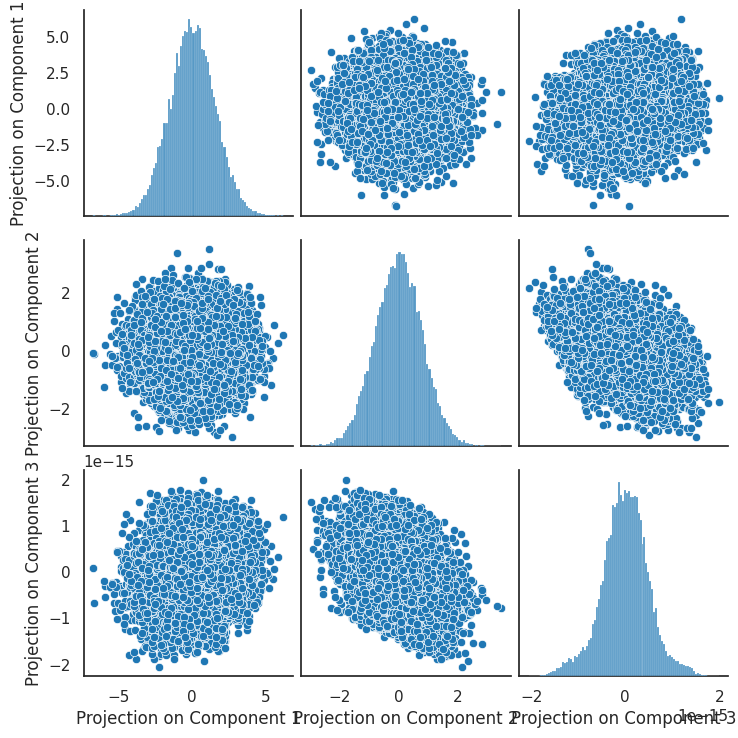

In [64]:
# Vẽ pairplot cho dữ liệu sau khi áp dụng PCA
sns.pairplot(hwdf_PCA)
# Hiển thị biểu đồ
plt.show()

In [65]:
# Tính ma trận tương quan cho dữ liệu sau khi áp dụng PCA và hiển thị với màu nền gradient
hwdf_PCA.corr().style.background_gradient(cmap='coolwarm')

,Projection on Component 1,Projection on Component 2,Projection on Component 3
Projection on Component 1,1.000000,-0.000000,0.156017
Projection on Component 2,-0.000000,1.000000,-0.412401
Projection on Component 3,0.156017,-0.412401,1.000000


As you can see, the correlations of the 3 principal components are now zero, meaning we have successfully de-correlated `hwdf` and obtained features that are linearly independent of each other.

Each component provides variance/information on a different direction. As we saw before that, the third component had a small projection, which means it doesn't provide much information about our original data `hwdf` in the new feature space.

Thus, we can remove the third dimension, while still keeping the vast majority of our data's information:


In [66]:
# Loại bỏ cột 'Projection on Component 3' khỏi DataFrame
hwdf_PCA.drop('Projection on Component 3', axis=1, inplace=True)
# Hiển thị 5 dòng đầu tiên của DataFrame sau khi loại bỏ cột
hwdf_PCA.head()

,Projection on Component 1,Projection on Component 2
0,-2.051774,-0.243847
1,1.866218,1.117813
2,3.133436,-0.794420
3,1.696186,-0.748473
4,1.803402,-1.058234


### Putting it all Together


Now that you have some intuition behind PCA, let's start from the beginning and understand the PCA-pipeline.

In **sklearn.decomposition.PCA**, there is a parameter called `whiten` which helps standardize your input data if you set `whiten = True`. You could also use `StandardScaler()` as a separate step before using PCA.


In [67]:
# Tạo một đối tượng StandardScaler
scaler = StandardScaler()
# Chuẩn hóa dữ liệu và tạo DataFrame mới
X = pd.DataFrame(scaler.fit_transform(hwdf), index=hwdf.index, columns=hwdf.columns)
# Hiển thị 5 dòng đầu tiên của DataFrame đã chuẩn hóa
X.head()

# Tạo một đối tượng PCA
pca = PCA()
# Fit PCA và transform dữ liệu, sau đó tạo DataFrame mới
X_PCA = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=[f'Component {i}' for i in range(pca.n_components_)])
# (Lưu ý: Đây thực chất là "Chiếu lên thành phần {i}")
# Hiển thị 5 dòng đầu tiên của DataFrame sau khi áp dụng PCA
X_PCA.head()

,Component 0,Component 1,Component 2
Index,,,
1,-2.051774,-0.243847,1.179062e-15
2,1.866218,1.117813,2.899065e-16
3,3.133436,-0.794420,5.765177e-17
4,1.696186,-0.748473,-4.504161e-16
5,1.803402,-1.058234,-2.240654e-16


By default, `sklearn.decomposition.PCA` sorts the components by their explained variance.

Let's analyze the explained variance ratios:


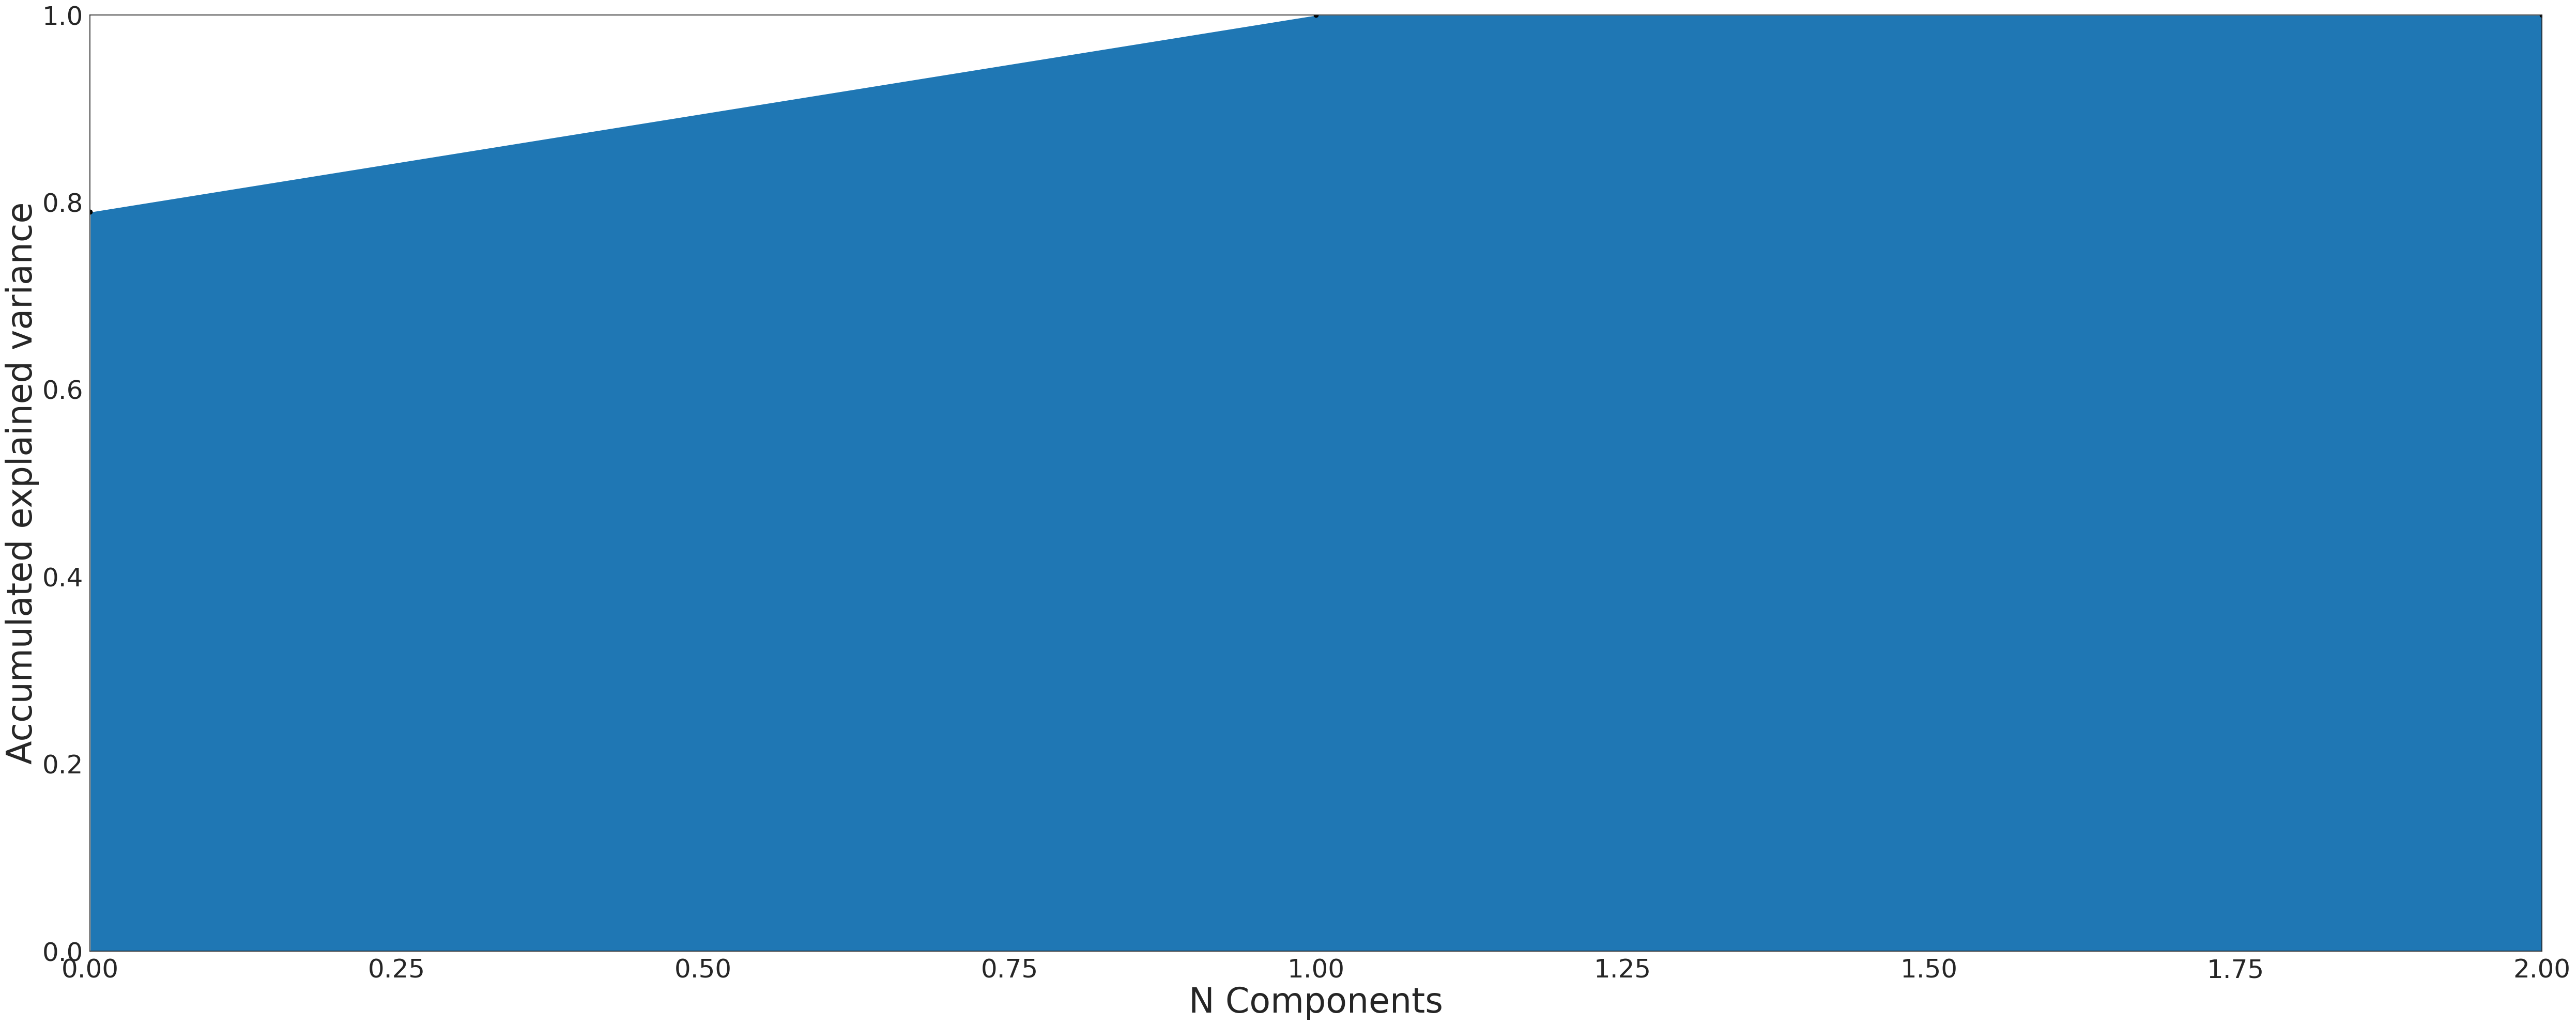

In [68]:
# Gọi hàm để vẽ biểu đồ phương sai được giải thích tích lũy
plot_explained_variance(pca)

Suppose a $99%$ threshold is sufficient for our task, let's see how many components (dimensions) we can drop:


In [69]:
# Đặt ngưỡng phương sai được giải thích mong muốn
threshold = 0.99
# Tìm số lượng thành phần tối thiểu để đạt được ngưỡng
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)
# In kết quả
print(f'We can keep the first {num} components and discard the other {pca.n_components_-num},')
print(f'keeping >={100 * threshold}% of the explained variance!')

We can keep the first 2 components and discard the other 1,
keeping >=99.0% of the explained variance!


In [70]:
# Loại bỏ các cột thành phần không cần thiết khỏi DataFrame
X_PCA.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
# Hiển thị 5 dòng đầu tiên của DataFrame sau khi giảm chiều
X_PCA.head()

,Component 0,Component 1
Index,,
1,-2.051774,-0.243847
2,1.866218,1.117813
3,3.133436,-0.794420
4,1.696186,-0.748473
5,1.803402,-1.058234


## Using PCA to Improve Facial Recognition

PCA is commonly used for Facial Recognition.

In this example, we will apply a method called "**Eigenfaces**"

The idea of *eigenfaces* is:

1.  You have images of faces of dimension $a \times b$ pixels.
2.  You "roll" these out into vectors of size $a \cdot n$.
3.  You apply PCA to the vectors.
4.  You determine how many principal components you want to train under; let's call this $C$.
5.  You train on the original image-vectors of size $a \cdot b$ projected onto your $C$ components, reshaped back to $a \times b$ bitmaps.


Load the Labeled Faces in the Wild (LFW) people datasetclassification


In [ ]:
# Tải bộ dữ liệu khuôn mặt LFW, chỉ lấy những người có ít nhất 70 khuôn mặt và thay đổi kích thước ảnh
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Introspect the images arrays to find the shapes (for plotting)


In [ ]:
# Kiểm tra kích thước của mảng ảnh để vẽ biểu đồ
N, h, w = lfw_people.images.shape # N: số lượng ảnh, h: chiều cao, w: chiều rộng
target_names = lfw_people.target_names # Tên của các lớp (tên người)

We load our features <code>X</code> and labels <code>y</code>. The images are flattened such that each one is a row in the NumPy array <code>X</code>


In [ ]:
y = lfw_people.target # Gán nhãn (mục tiêu)
X = lfw_people.data # Gán dữ liệu (ảnh đã làm phẳng)
n_features = X.shape[1] # Số lượng feature (số pixel sau khi làm phẳng)

We plot out each class and an image belonging to that class:


In [ ]:
# Lặp qua từng người (lớp) trong bộ dữ liệu
for person in np.unique(lfw_people.target):
    # Tìm chỉ mục của ảnh đầu tiên của người đó
    idx = np.argmax(lfw_people.target == person)
    # Hiển thị ảnh
    plt.imshow(lfw_people.images[idx], cmap='gray') # Sử dụng cmap='gray' để hiển thị ảnh xám
    # Đặt tiêu đề cho biểu đồ là tên của người đó
    plt.title(lfw_people.target_names[person])
    # Hiển thị biểu đồ
    plt.show()

We split the data into training and testing


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42 # test_size=0.25: 25% dữ liệu cho tập kiểm tra, random_state để kết quả có thể lặp lại
)

We train a Support Vector Machines model for classification and use a random search method to find a set of optimal hyperparameters


In [ ]:
# Định nghĩa lưới siêu tham số cho RandomizedSearchCV
param_grid = {
    "C": loguniform(1e3, 1e5), # Siêu tham số C cho SVC, lấy mẫu từ phân phối log-uniform
    "gamma": loguniform(1e-4, 1e-1) # Siêu tham số gamma cho SVC, lấy mẫu từ phân phối log-uniform
}
# Tạo đối tượng RandomizedSearchCV với mô hình SVC, lưới tham số và số lần lặp (n_iter)
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
# Fit mô hình RandomizedSearchCV trên dữ liệu huấn luyện để tìm siêu tham số tốt nhất
clf = clf.fit(X_train, y_train)

We make a prediction using the test data:


In [ ]:
# Dự đoán nhãn cho dữ liệu kiểm tra sử dụng mô hình tốt nhất tìm được từ RandomizedSearchCV
y_pred = clf.predict(X_test)

Let's see how well our `SVC` did on the test data:


In [ ]:
# Tạo heatmap cho ma trận nhầm lẫn
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred), # Tính ma trận nhầm lẫn giữa nhãn thực tế và nhãn dự đoán
    annot=True, # Hiển thị giá trị trên heatmap
    xticklabels=lfw_people.target_names, # Nhãn trục x là tên của các lớp
    yticklabels=lfw_people.target_names, # Nhãn trục y là tên của các lớp
    fmt='g' # Định dạng giá trị hiển thị là số nguyên
)
# Đặt nhãn cho trục x
hmap.set_xlabel('Predicted Value')
# Đặt nhãn cho trục y
hmap.set_ylabel('Truth Value')

We see all the images are being classifed as George Bush. Clearly it's having trouble differentiating between the faces.


Now, let’s try using PCA, we fit a PCA model :


In [ ]:
# Tạo đối tượng PCA với svd_solver='full' (sử dụng phân rã giá trị suy biến đầy đủ) và whiten=True (chuẩn hóa dữ liệu)
pca = PCA(svd_solver='full',  whiten=True).fit(X_train) # Fit PCA trên dữ liệu huấn luyện

We find the projections on to each principle  component for a person int the dataset, we select the sample <code>person_index</code> :


In [ ]:
# Chọn chỉ mục của người muốn xem
person_index=1

In [ ]:
# Áp dụng PCA transform cho ảnh của người được chọn
# reshape(1, -1) để đảm bảo đầu vào có dạng 2D (1 mẫu, số feature)
Xhat=pca.transform(X[person_index,:].reshape(1, -1))

We can find the projections back to each component, i.e the inverse transform;as we use all the non-zero components the images are identical.


In [ ]:
# Hiển thị ảnh sau khi áp dụng PCA và inverse transform
# pca.inverse_transform(Xhat) đưa dữ liệu từ không gian PCA trở về không gian gốc
# .reshape(h, w) định hình lại vector thành ảnh có kích thước gốc
plt.imshow(pca.inverse_transform(Xhat).reshape(h, w), cmap='gray')
plt.title("Image after PCA and inverse transform"  ) # Đặt tiêu đề
plt.show() # Hiển thị ảnh

# Hiển thị ảnh gốc của người được chọn
plt.imshow(lfw_people.images[person_index],cmap='gray') # Sử dụng cmap='gray' để hiển thị ảnh xám
plt.title("Image") # Đặt tiêu đề
plt.show() # Hiển thị ảnh

We can use the Explained variance-ratio to determine the number of components to keep, we can plot it as Cumulative distribution.


In [ ]:
# Gọi hàm để vẽ biểu đồ phương sai được giải thích tích lũy
plot_explained_variance(pca)
# Hiển thị biểu đồ (lưu ý: plot_explained_variance đã gọi plt.show(), dòng này có thể dư)
plt.show()

It looks like 150 components explain over 95% of the variance, usually 80% will do, let’s try and visualize some components.

<p>
<b>Note:</b> you can use Cross-validation to select the number of components  
</p>


Let’s select the  components that explain over 60% of the variance


In [ ]:
# Đặt ngưỡng cho phương sai được giải thích
threshold = 0.60

This corresponds to 7 principle components


In [ ]:
# Tính tổng tích lũy tỷ lệ phương sai được giải thích
# Kiểm tra các thành phần đóng góp ít hơn ngưỡng (0.60)
components = np.cumsum(pca.explained_variance_ratio_) < threshold

# Tính tổng mảng boolean để lấy số lượng thành phần thỏa mãn điều kiện
# Điều này cho biết số lượng thành phần giải thích phương sai ít hơn ngưỡng
# Lưu ý: Cách tính này có vẻ phản trực giác dựa trên ô markdown phía trên nó, nói rằng điều này tương ứng với 7 thành phần chính.
# Ô tiếp theo vẽ biểu đồ các thành phần này, vì vậy có khả năng nó nhằm mục đích hiển thị các thành phần *cùng nhau* giải thích đến ngưỡng.
# Tuy nhiên, dựa trên logic mã hiện tại, nó đang tính số lượng thành phần riêng lẻ giải thích *ít hơn* ngưỡng.
components.sum()

We can reshape the principle components to a rectangle  and plot them, remember the images are linear  combinations of these components


In [ ]:
# Lặp qua các thành phần chính giải thích phương sai ít hơn ngưỡng
# và định hình lại và hiển thị chúng dưới dạng hình ảnh
for component in pca.components_[components,:]:
    # Định hình lại vector thành phần thành kích thước hình ảnh gốc (h, w)
    plt.imshow(component.reshape(h, w),cmap='gray')
    # Hiển thị hình ảnh
    plt.show()

Let's now use PCA with `n_components = 150`:


In [ ]:
# Tạo đối tượng PCA mới với n_components=150, svd_solver="randomized" và whiten=True
pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(X_train) # Fit PCA trên dữ liệu huấn luyện

We apply the PCA transform on the training and testing data


In [ ]:
# Áp dụng PCA transform lên dữ liệu huấn luyện và kiểm tra
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**NOTE**: We can also transform the data back ("inverse_transform") to its original space, with the rest of the components to zero, then convert it to an image. For instance, let's look at one of the images using <code>person_index = 1</code>


In [ ]:
person_index = 1

In [ ]:
# Chọn chỉ mục của người muốn xem
person_index = 1

# Tạo figure và subplot để hiển thị ảnh gốc và ảnh sau PCA + inverse transform
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1) # Tạo subplot 1 hàng, 2 cột, ở vị trí 1
plt.imshow(lfw_people.images[person_index,:,:],cmap='gray') # Hiển thị ảnh gốc
plt.title("Original image") # Đặt tiêu đề

plt.subplot(1,2,2) # Tạo subplot 1 hàng, 2 cột, ở vị trí 2
# Áp dụng PCA transform, sau đó inverse transform, và định hình lại thành ảnh
plt.imshow(pca.inverse_transform(pca.transform(X[person_index ,:].reshape(1, -1))).reshape(h, w),cmap='gray')
plt.title("PCA transformed and inverse-transformed image ") # Đặt tiêu đề

plt.tight_layout() # Điều chỉnh layout
plt.show() # Hiển thị biểu đồ

We train the model and find the best Hyperparameters using the transformed data:


In [ ]:
# Định nghĩa lưới siêu tham số cho RandomizedSearchCV (giống như trước)
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
# Tạo đối tượng RandomizedSearchCV với mô hình SVC, lưới tham số và số lần lặp (n_iter)
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

# Fit mô hình RandomizedSearchCV trên dữ liệu huấn luyện đã được PCA giảm chiều
clf = clf.fit(X_train_pca, y_train)

We see the model using PCA performs much better!


In [ ]:
# Dự đoán nhãn cho dữ liệu kiểm tra đã được PCA giảm chiều
y_pred = clf.predict(X_test_pca)

In [ ]:
# Tạo heatmap cho ma trận nhầm lẫn sử dụng kết quả dự đoán trên dữ liệu đã giảm chiều
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred), # Tính ma trận nhầm lẫn
    annot=True, # Hiển thị giá trị
    xticklabels=lfw_people.target_names, # Nhãn trục x
    yticklabels=lfw_people.target_names, # Nhãn trục y
    fmt='g' # Định dạng số nguyên
)
# Đặt nhãn trục x
hmap.set_xlabel('Predicted Value')
# Đặt nhãn trục y
hmap.set_ylabel('Truth Value')

# Exercises

Run the following code cell to complete the exercises

We download and clean the dataset `energydata_complete.csv` containing real-world energy data:


In [ ]:
# Tải dữ liệu từ URL vào DataFrame
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv')
# Loại bỏ cột 'date'
df.drop('date', axis=1, inplace=True)
# Loại bỏ các hàng chứa giá trị NaN và chuyển đổi kiểu dữ liệu sang float64
df = df.dropna().astype(np.float64)
# Hiển thị 5 dòng đầu tiên của DataFrame đã làm sạch
df.head()

The columns can be described as follows:

*   `Appliances` - energy use of appliances in Wh
*   `lights` - energy use of light fixtures in the house in Wh
*   `T1` - Temperature in kitchen area, in Celsius
*   `RH_1` - Humidity in kitchen area, in $%$
*   `T2` - Temperature in living room area, in Celsius
*   `RH_2` - Humidity in living room area, in $%$
*   $\dots$
*   `To` - Temperature outside (from Chievres weather station), in Celsius
*   `Pressure` - (from Chievres weather station), in mm Hg
*   `RH_out` - Humidity outside (from Chievres weather station), in %
*   `Wind speed` - (from Chievres weather station), in m/s
*   `Visibility` - (from Chievres weather station), in km
*   `Tdewpoint` - (from Chievres weather station), Â°C
*   `rv1`, `rv2` - Random variable 1 & 2, nondimensional

Please see the [data source](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for more information.


## Exercise 1 - Scaling the Data


Scale the data in `df` using sklearn.preprocessing.StandardScaler

(You don't need to change the names of the columns like we did in the examples).


In [ ]:
# TODO: Mã cần thêm vào cho bài tập
# Tạo một đối tượng StandardScaler
scaler = StandardScaler()
# Áp dụng chuẩn hóa cho toàn bộ DataFrame và gán lại
df[:] = scaler.fit_transform(df)
# Hiển thị 5 dòng đầu tiên của DataFrame sau khi chuẩn hóa
df.head()

<details>
    <summary>Click here for Solution</summary>

```python
scaler = StandardScaler()
df[:] = scaler.fit_transform(df)
df.head()
```

</details>


## Exercise 2 - Fitting PCA Object


Create a `PCA` object called `pca` and fit it to the dataframe `df`

(You don't need to change the names of the columns).


In [ ]:
# TODO: Mã cần thêm vào cho bài tập
# Tạo một đối tượng StandardScaler
scaler = StandardScaler()
# Chuẩn hóa dữ liệu (lặp lại bước trước, có thể không cần thiết nếu đã chạy ô trước)
df[:] = scaler.fit_transform(df)
# Hiển thị 5 dòng đầu tiên của DataFrame sau khi chuẩn hóa (lặp lại)
df.head()

<details>
    <summary>Click here for Solution</summary>

```python
pca = PCA()
pca.fit(df)
```

</details>


## Exercise 3 - Finding Desired Number of Components


Find the minimum number of components that cover a total explained variance of $95%$ or more


In [ ]:
# TODO: Mã cần thêm vào cho bài tập
# Tính tổng tích lũy của tỷ lệ phương sai được giải thích
# Tìm chỉ mục đầu tiên mà tổng tích lũy >= 0.95
# Lấy giá trị chỉ mục đó (là một mảng 2D, nên lấy [0][0])
# Cộng 1 vì chỉ mục bắt đầu từ 0
np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1

<details>
    <summary>Click here for a Sample Solution</summary>

```python
np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1
```

</details>


## Exercise 4 - Dimensionality Reduction


Reduce your dataset to one with PCA applied to it, where the new number of dimensions is the answer you got in the Exercise 3.

Assign the result to a variable called `reduced_data`. (No need to convert the result to a `pandas.DataFrame`).

Hint: It might be easiest to use a new `PCA` object using the [`n_components` parameter](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


In [ ]:
# TODO: Mã cần thêm vào cho bài tập
# Tạo đối tượng PCA với số lượng thành phần là 12
pca = PCA(n_components=12)
# Fit PCA vào dữ liệu và áp dụng transform để giảm chiều dữ liệu
reduced_data = pca.fit(df).transform(df)

<details>
    <summary>Click here for a Sample Solution</summary>

```python
pca = PCA(n_components=12)
reduced_data = pca.fit(df).transform(df)
```

</details>


Let's view the result as a `pandas.DataFrame`:


In [ ]:
# Tạo DataFrame từ dữ liệu đã giảm chiều
# Đặt tên cột là 'Component i'
# Hiển thị 5 dòng đầu tiên của DataFrame đã giảm chiều
pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()

# Congratulations! - You have completed the lab


## Authors

[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By     | Change Description          |
| ----------------- | ------- | -------------- | --------------------------- |
| 2021-12-20        | 0.1     | Sam Prokopchuk | Complete Exercises' content |
| 2022-05-20        | 0.2     | Roxanne Li     | Review and edit             |
| 2022-07-15        | 0.2     | Svitlana K     | Review and edit             |


Copyright © 2021 IBM Corporation. All rights reserved.
